<img src='../img/bimbo.png'>

- Task: Demand = Sales - Returns
- Create holdout test set

## Data exploration

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
dir_sub = "C:/Users/568377/Cognizant/Data Science/kaggle/Bimbo Bread/submissions/"
dir_raw = "C:/Users/568377/Cognizant/Data Science/kaggle/Bimbo Bread/raw/"

In [2]:
subm = pd.read_csv(os.path.join(dir_raw,"sample_submission.csv"))
prod = pd.read_csv(os.path.join(dir_raw,"producto_tabla.csv"))
town_state = pd.read_csv(os.path.join(dir_raw,"town_state.csv"))
client = pd.read_csv(os.path.join(dir_raw,"cliente_tabla.csv"))

In [3]:
test = pd.read_csv(os.path.join(dir_raw,"test.csv"), nrows=500000)
train = pd.read_csv(os.path.join(dir_raw,"train.csv"), nrows=500000)

### Features

#### Product

In [4]:
# prod.head()

In [5]:
# extract weight and volume from product name
prod['unit_g'] = prod['NombreProducto'].str.extract("([0-9]+)(g )", expand=True)[1]
prod['amount_g'] = prod['NombreProducto'].str.extract("([0-9]+)(g )", expand=True)[0]
prod['unit_ml'] = prod['NombreProducto'].str.extract("([0-9]+)(ml )", expand=True)[1]
prod['amount_ml'] = prod['NombreProducto'].str.extract("([0-9]+)(ml )", expand=True)[0]

# make numeric
prod['amount_g'] = prod['amount_g'].convert_objects(convert_numeric=True)
prod['amount_ml'] = prod['amount_ml'].convert_objects(convert_numeric=True)

c:\users\568377\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
c:\users\568377\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [6]:
# prod

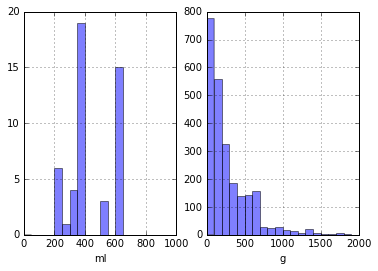

In [7]:
# show distribution of weight / volume
fig, axs = plt.subplots(1,2)
bins_ml=[i for i in range(0,1000,50)]
bins_g=[i for i in range(0,2000,100)]

prod['amount_ml'].hist(ax=axs[0],bins=bins_ml,alpha=0.5)
axs[0].set_xlabel("ml")
prod['amount_g'].hist(ax=axs[1],bins=bins_g,alpha=0.5)
axs[1].set_xlabel("g")

# NEXT STEPS
- Categorize food
- Quota of large items
- How new is item?

#### Town/State

In [8]:
# town_state.head()

In [9]:
# make lowercase
town_state['Town'] = town_state['Town'].str.lower()
town_state['State'] = town_state['State'].str.lower()
# separate zip, town_name
town_state['zip'] = town_state['Town'].str[:4]
town_state['town_name'] = town_state['Town'].str[5:]

In [10]:
# town_state.head()

In [11]:
# check uniques
# len(town_state['Town'].unique()), len(town_state['zip'].unique()), len(town_state['town_name'].unique())
##town_state = town_state.groupby('zip')
##town_state['Town'].str[4].unique() -> clean

In [12]:
# twice, similar zips have different town_names
df = town_state.groupby('zip').Town.nunique()
df[df==2] #3 entries with different town names
double_town_names = np.array(df[df==2].index)
double_town_names # zips

array(['2152', '2169'], dtype=object)

In [13]:
town_state['zip'].max() #max zip number

'3216'

In [14]:
town_state[town_state['zip'] == double_town_names[0]]

,Agencia_ID,Town,State,zip,town_name
199,1524,2152 cruce de anden noroeste,baja california norte,2152,cruce de anden noroeste
371,2022,2152 altamirano_bm,guerrero,2152,altamirano_bm
583,21529,2152 altamirano_bm,guerrero,2152,altamirano_bm


In [15]:
town_state.loc[199,'zip']=9999
town_state.loc[199,'Town']="9999 cruce de anden noroeste"
town_state[town_state['zip'] == 9999]

,Agencia_ID,Town,State,zip,town_name
199,1524,9999 cruce de anden noroeste,baja california norte,9999,cruce de anden noroeste


In [16]:
town_state[town_state['zip'] == double_town_names[1]]

,Agencia_ID,Town,State,zip,town_name
311,1694,2169 cruce de andén sureste,puebla,2169,cruce de andén sureste
372,2023,2169 pinotepa,oaxaca,2169,pinotepa
599,21699,2169 pinotepa,oaxaca,2169,pinotepa


In [17]:
town_state.loc[311,'zip']=9998
town_state.loc[311,'Town']="9998 cruce de andén sureste"
town_state[town_state['zip'] == 9998]

,Agencia_ID,Town,State,zip,town_name
311,1694,9998 cruce de andén sureste,puebla,9998,cruce de andén sureste


In [18]:
# town_state.head()

In [19]:
# len(town_state['Town'].unique()), len(town_state['zip'].unique()), len(town_state['town_name'].unique())

In [20]:
df1 = town_state.groupby('town_name').zip.nunique()

In [21]:
df1[df1==2]

town_name
los mochis    2
pinotepa      2
Name: zip, dtype: int64

In [22]:
df1[df1==2] #3 entries with different town names
double_zip_names = np.array(df1[df1==2].index)
double_zip_names # zips

array(['los mochis', 'pinotepa'], dtype=object)

In [23]:
town_state[town_state['town_name'] == double_zip_names[0]] #towns can have multiple zip codes!!! :)

,Agencia_ID,Town,State,zip,town_name
211,1544,2561 los mochis,sinaloa,2561,los mochis
227,1564,2561 los mochis,sinaloa,2561,los mochis
248,1598,2561 los mochis,sinaloa,2561,los mochis
498,2655,2655 los mochis,sinaloa,2655,los mochis
774,25619,2561 los mochis,sinaloa,2561,los mochis


In [24]:
town_state[town_state['town_name'] == double_zip_names[1]] #ID 387 interferes with town_name. If town_name big effect, look here. Test here for improvement.

,Agencia_ID,Town,State,zip,town_name
372,2023,2169 pinotepa,oaxaca,2169,pinotepa
387,2055,2055 pinotepa,puebla,2055,pinotepa
599,21699,2169 pinotepa,oaxaca,2169,pinotepa


In [25]:
# town_state.head()

In [26]:
# Create new category city type:
town_state['town_name_corpus'] = town_state['town_name']
town_state['town_name_type'] = ""

In [27]:
# add town_name_type and add "ag"
town_state.loc[town_state['town_name_corpus'].str[:4] == "ag. ", 'town_name_type'] = "ag"
# remove ag from town_name_corpus
town_state.loc[town_state['town_name_corpus'].str[:4] == "ag. ", 'town_name_corpus'] = town_state.loc[town_state['town_name_corpus'].str[:4] == "ag. ", 'town_name_corpus'].str[4:]

town_state.loc[town_state['town_name_corpus'].str[:3] == "ag.", 'town_name_type'] = "ag"
town_state.loc[town_state['town_name_corpus'].str[:3] == "ag.", 'town_name_corpus'] = town_state.loc[town_state['town_name_corpus'].str[:3] == "ag.", 'town_name_corpus'].str[3:]

town_state.loc[town_state['town_name_corpus'].str[:4] == "cd. ", 'town_name_type'] = "cd"
town_state.loc[town_state['town_name_corpus'].str[:4] == "cd. ", 'town_name_corpus'] = town_state.loc[town_state['town_name_corpus'].str[:4] == "cd. ", 'town_name_corpus'].str[4:]

In [28]:
#town_state.head()
#sorted(town_state['town_name'].str[:30].unique())

#### Client

In [29]:
client.head()

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT


In [30]:
test.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238
2,2,10,2045,1,2831,4549769,32940
3,3,11,1227,1,4448,4717855,43066
4,4,11,1219,1,1130,966351,1277


In [31]:
train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3


## Merge product ID, train

In [32]:
train.tail()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
499995,3,1120,1,2116,1182439,31588,1,11.53,0,0.0,1
499996,3,1120,1,2116,1182439,35841,4,27.68,0,0.0,4
499997,3,1120,1,2116,1182439,36746,2,23.06,0,0.0,2
499998,3,1120,1,2116,1182439,36747,1,11.53,0,0.0,1
499999,3,1120,1,2116,1243274,30532,3,23.34,0,0.0,3


In [36]:
train = pd.read_csv(os.path.join(dir_raw,"train.csv"), nrows=500000)

In [37]:
train = pd.merge(train, prod, on='Producto_ID', how='left')
train = pd.merge(train, town_state, on='Agencia_ID', how='left')
train = pd.merge(train, client, on='Cliente_ID')

In [38]:
train

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,...,amount_g,unit_ml,amount_ml,Town,State,zip,town_name,town_name_corpus,town_name_type,NombreCliente
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,...,120.0,NaN,NaN,2008 ag. lago filt,"méxico, d.f.",2008,ag. lago filt,lago filt,ag,PUESTO DE PERIODICOS LAZARO
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,...,135.0,NaN,NaN,2008 ag. lago filt,"méxico, d.f.",2008,ag. lago filt,lago filt,ag,PUESTO DE PERIODICOS LAZARO
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,...,140.0,NaN,NaN,2008 ag. lago filt,"méxico, d.f.",2008,ag. lago filt,lago filt,ag,PUESTO DE PERIODICOS LAZARO
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,...,125.0,NaN,NaN,2008 ag. lago filt,"méxico, d.f.",2008,ag. lago filt,lago filt,ag,PUESTO DE PERIODICOS LAZARO
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,...,105.0,NaN,NaN,2008 ag. lago filt,"méxico, d.f.",2008,ag. lago filt,lago filt,ag,PUESTO DE PERIODICOS LAZARO
5,3,1110,7,3301,15766,1250,5,38.20,0,0.0,...,105.0,NaN,NaN,2008 ag. lago filt,"méxico, d.f.",2008,ag. lago filt,lago filt,ag,PUESTO DE PERIODICOS LAZARO
6,3,1110,7,3301,15766,1309,3,20.28,0,0.0,...,66.0,NaN,NaN,2008 ag. lago filt,"méxico, d.f.",2008,ag. lago filt,lago filt,ag,PUESTO DE PERIODICOS LAZARO
7,3,1110,7,3301,15766,3894,6,56.10,0,0.0,...,120.0,NaN,NaN,2008 ag. lago filt,"méxico, d.f.",2008,ag. lago filt,lago filt,ag,PUESTO DE PERIODICOS LAZARO
8,3,1110,7,3301,15766,4085,4,24.60,0,0.0,...,69.0,NaN,NaN,2008 ag. lago filt,"méxico, d.f.",2008,ag. lago filt,lago filt,ag,PUESTO DE PERIODICOS LAZARO
9,3,1110,7,3301,15766,5310,6,31.68,0,0.0,...,50.0,NaN,NaN,2008 ag. lago filt,"méxico, d.f.",2008,ag. lago filt,lago filt,ag,PUESTO DE PERIODICOS LAZARO


In [40]:
client['Cliente_ID'].unique()

,Cliente_ID,NombreCliente
935357,11011586,OXXO PETEN
935358,11693264,SUPER ABARROTES MARY
935359,19988629,NO IDENTIFICADO
935360,99999999,NO IDENTIFICADO
935361,2015152015,NO IDENTIFICADO


In [55]:
df = client.groupby(0).Cliente_ID.nunique()

930500

In [53]:
df[df==1] #3 entries with different town names
double_town_names = np.array(df[dfy1].index)
double_town_names # zips

array([], dtype=int64)

# Feature engineering

https://www.kaggle.com/cast42/rossmann-store-sales/xgboost-in-python-with-rmspe-v2/code

In [2]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import xgboost as xgb
import operator
import matplotlib

ImportError: No module named 'xgboost'

# sub 2

In [85]:
train = pd.read_csv(os.path.join(dir_raw,"sample_submission.csv"))

In [86]:
train["Demanda_uni_equil"]=6

In [87]:
train.to_csv(os.path.join(dir_sub, "submission_2.csv"), index=False)